In [1]:
cd /content/drive/MyDrive/minor

/content/drive/MyDrive/minor


In [2]:
import tensorflow as tf
from PIL import Image
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import roc_curve, auc

In [3]:
path='FingerprintColorImageDatabase .v1/FingerprintColorImageDatabase .v1/'
train_images=[]
test_images=[] 
test_labels=[] 
train_labels=[] 
test_images_show=[] 
train_images_show=[] 
for k in range(1,31):
    for l in range(1,6):
        img=Image.open(path+'sub'+str(k)+'/'+str(k)+str(l)+'.jpg')
        img=np.array(img)
        img_arr=img/255
        img_arr_bin=img//200
        if l==5:
            test_images.append(img_arr_bin)
            test_labels.append(k-1)
            test_images_show.append(img_arr) 
        if l<5:
            train_images.append(img_arr_bin) 
            train_labels.append(k-1)
            train_images_show.append(img_arr)

In [ ]:
path='pores/pores'
pores_out_train,pores_out_test=[],[] 
for i in range(1,31):
  for j in range(1,6):
    f=open(path+str((i%30)+1)+'/pores'+str(j)+'.txt','r')
    temp=[] 
    for line in f:
      temp.append(list(map(int,line.split())))
    if j==5:
      pores_out_test.append(temp) 
    else:
      pores_out_train.append(temp) 

In [ ]:
train_images=np.array(train_images) 
print(train_images.shape)
test_images=np.array(test_images) 
train_labels=np.array(train_labels) 
test_labels=np.array(test_labels) 
train_images_show=np.array(train_images_show) 
test_images_show=np.array(test_images_show) 
print(test_images_show.shape)
pores_output_train=np.array(pores_out_train) 
print(pores_output_train.shape,len(pores_out_train),len(pores_out_train[0]))
pores_output_test=np.array(pores_out_test) 
print(pores_output_test.shape)

(120, 200, 200, 3)
(30, 200, 200, 3)
(120, 200, 200) 120 200
(30, 200, 200)


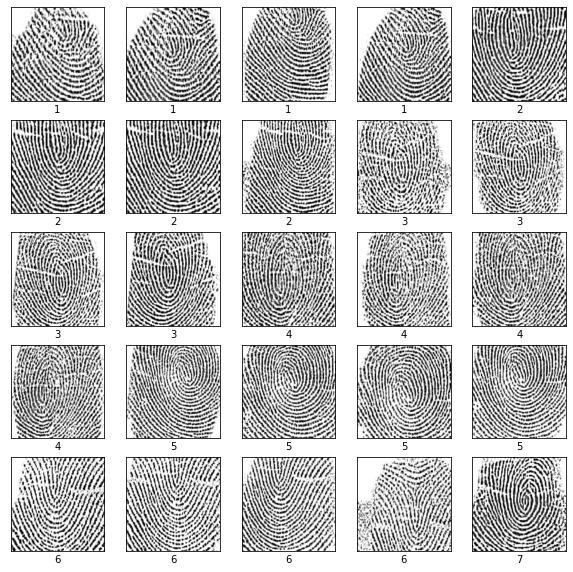

In [ ]:
class_names = [i for i in range(1,31)]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_show[i], cmap=plt.cm.binary)
    #plt.imshow(pores_output_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(200, 200,3),padding='SAME'))
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(train_images, pores_output_train, epochs=120,validation_data=(test_images,pores_output_test))

Epoch 1/120
4/4 [==============================] - 7s 154ms/step - loss: 0.9836 - accuracy: 0.0061 - val_loss: 0.9811 - val_accuracy: 0.0065
Epoch 2/120
4/4 [==============================] - 0s 21ms/step - loss: 0.9803 - accuracy: 0.0062 - val_loss: 0.9779 - val_accuracy: 0.0065
Epoch 3/120
4/4 [==============================] - 0s 22ms/step - loss: 0.9769 - accuracy: 0.0061 - val_loss: 0.9721 - val_accuracy: 0.0065
Epoch 4/120
4/4 [==============================] - 0s 21ms/step - loss: 0.9698 - accuracy: 0.0067 - val_loss: 0.9631 - val_accuracy: 0.0075
Epoch 5/120
4/4 [==============================] - 0s 22ms/step - loss: 0.9604 - accuracy: 0.0073 - val_loss: 0.9536 - val_accuracy: 0.0083
Epoch 6/120
4/4 [==============================] - 0s 21ms/step - loss: 0.9502 - accuracy: 0.0080 - val_loss: 0.9443 - val_accuracy: 0.0084
Epoch 7/120
4/4 [==============================] - 0s 22ms/step - loss: 0.9404 - accuracy: 0.0083 - val_loss: 0.9339 - val_accuracy: 0.0110
Epoch 8/120
4/4 [==

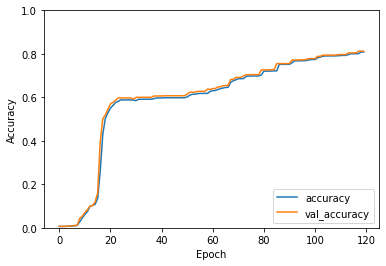

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

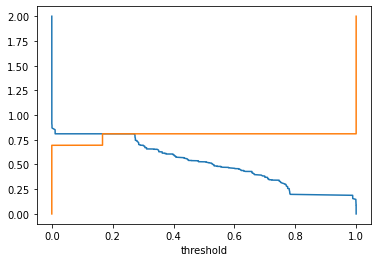

eer_threshold1 =  0.81049216
eer1 =  0.2712156823523528


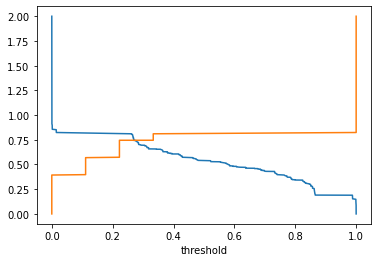

eer_threshold2 =  0.7451856
eer2 =  0.2694356230151784


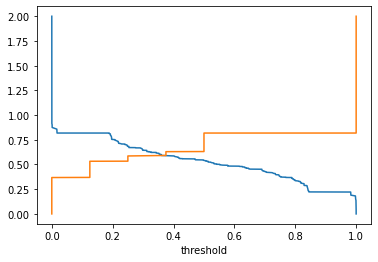

eer_threshold3 =  0.5914406
eer3 =  0.3604220844168834


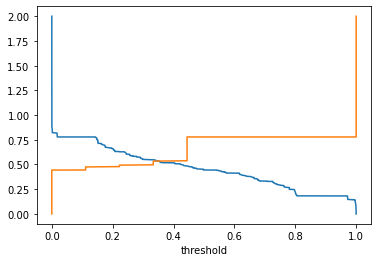

eer_threshold4 =  0.5339511
eer4 =  0.35380460603635816


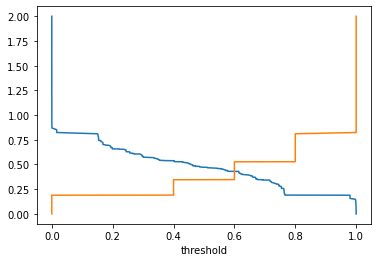

eer_threshold5 =  0.43019652
eer5 =  0.6144518064758094


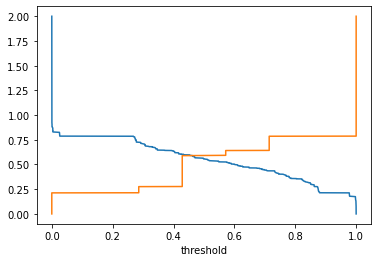

eer_threshold6 =  0.58946157
eer6 =  0.46280599104843345


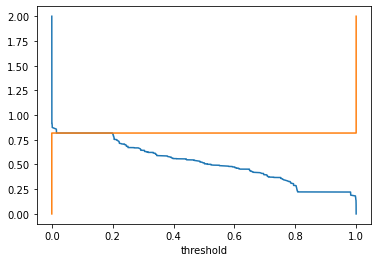

eer_threshold7 =  0.818224
eer7 =  0.19905497637440936


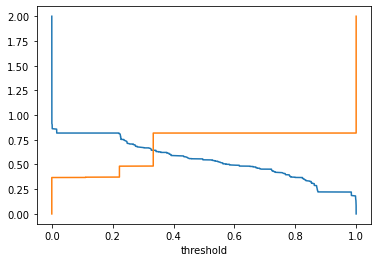

eer_threshold8 =  0.64382064
eer8 =  0.3304493511039984


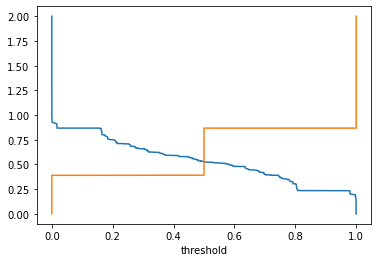

eer_threshold9 =  0.5261162
eer9 =  0.4981749087454373


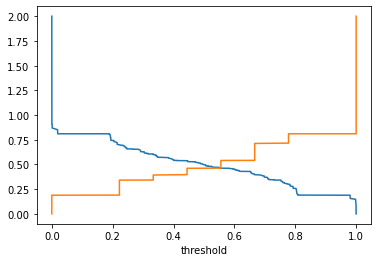

eer_threshold10 =  0.46299958
eer10 =  0.5501737891025481


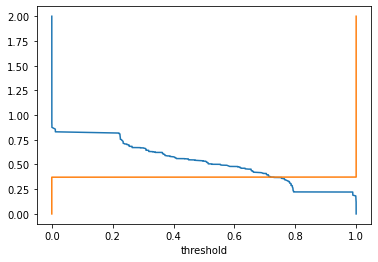

eer_threshold11 =  0.37281805
eer11 =  0.7183179579489487


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


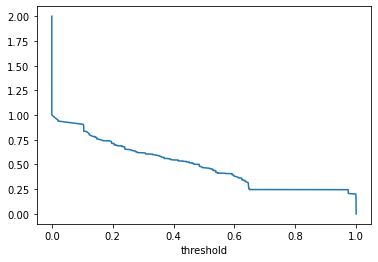

All-NaN slice encountered


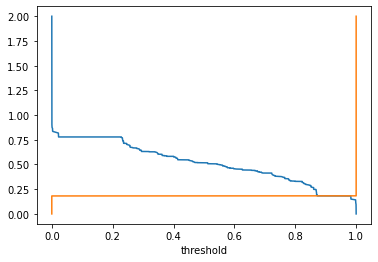

eer_threshold13 =  0.18294416
eer13 =  0.872396809920248


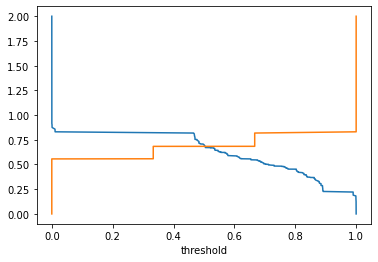

eer_threshold14 =  0.68395716
eer14 =  0.5022126659499463


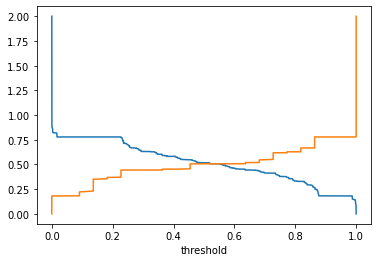

eer_threshold15 =  0.5075902
eer15 =  0.5342688478663264


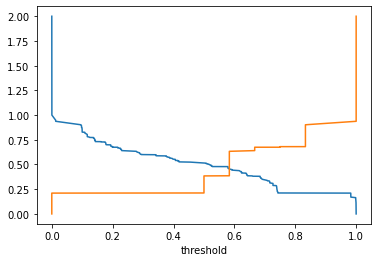

eer_threshold16 =  0.4574315
eer16 =  0.5834500350105032


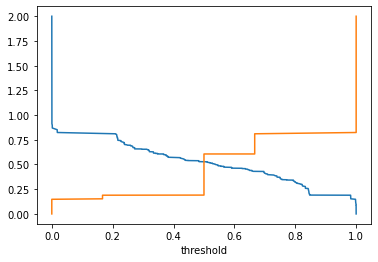

eer_threshold17 =  0.5280107
eer17 =  0.5029254388158224


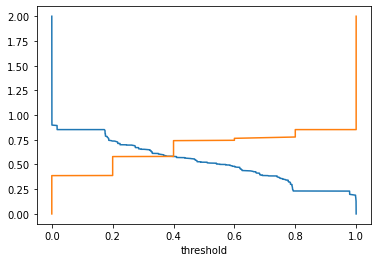

eer_threshold18 =  0.5817146
eer18 =  0.3972246530816352


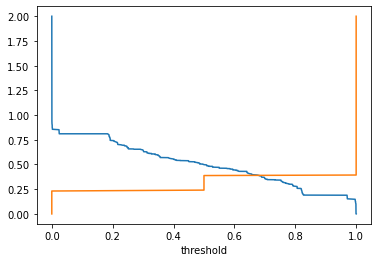

eer_threshold19 =  0.38820302
eer19 =  0.6819340967048353


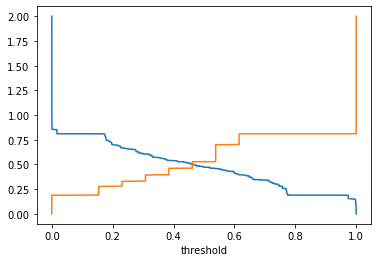

eer_threshold20 =  0.5042663
eer20 =  0.4634006051966889


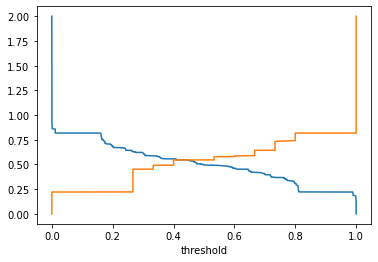

eer_threshold21 =  0.5460532
eer21 =  0.44954357884206575


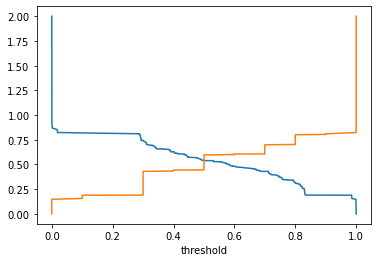

eer_threshold22 =  0.5410337
eer22 =  0.5015253813453363


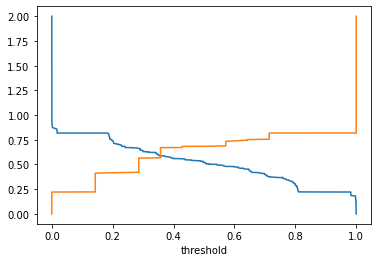

eer_threshold23 =  0.5868527
eer23 =  0.36252688440954334


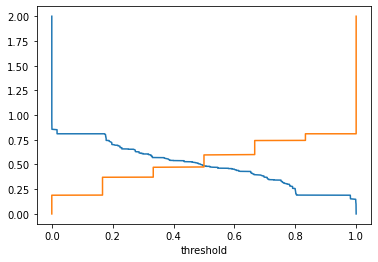

eer_threshold24 =  0.48641506
eer24 =  0.49699954993248985


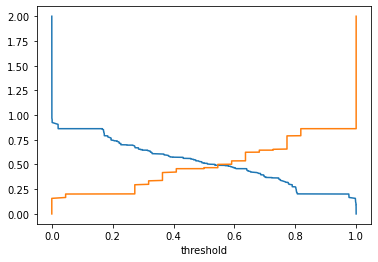

eer_threshold25 =  0.49247146
eer25 =  0.5361448796838261


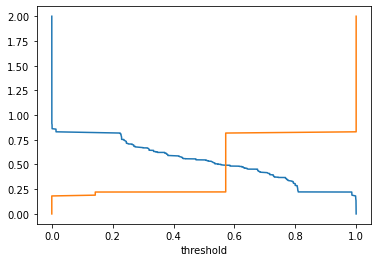

eer_threshold26 =  0.492915
eer26 =  0.5743755157152501


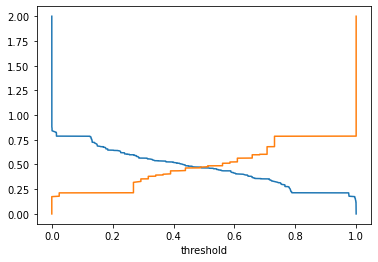

eer_threshold27 =  0.47363895
eer27 =  0.4904276883805901


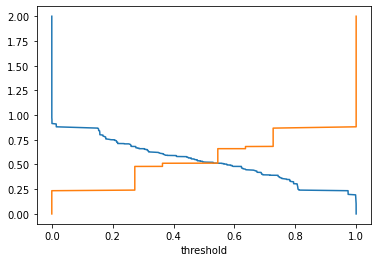

eer_threshold28 =  0.513812
eer28 =  0.5299707419540374


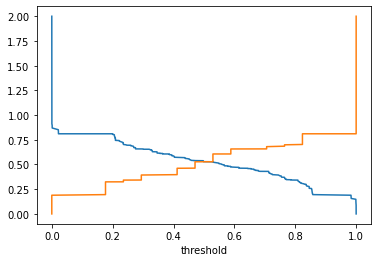

eer_threshold29 =  0.5280107
eer29 =  0.5232223695070405


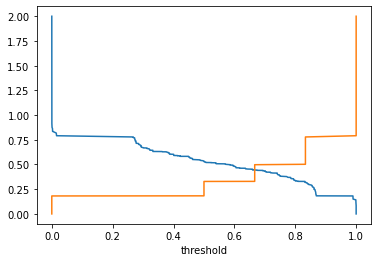

eer_threshold30 =  0.44465032
eer30 =  0.6597739660949142


In [ ]:
import math
pre=model.predict(test_images) 
tpr_of_threshold={} 
fpr_of_threshold={} 
tot_eer=0
successful_eer_cnt=0
actual_pores=0
true_predict=0
false_predict=0
for k in range(0,30):
  low,hig=5,-5
  for i in range(len(pre[k])):
    for j in range(len(pre[k][i])):
      hig=max(hig,pre[k][i][j]) 
      low=min(low,pre[k][i][j]) 
  y,y_pred=[],[] 
  for i in range(len(pre[k])):
    for j in range(len(pre[k][i])):
      y_pred.append((pre[k][i][j]-low)/(hig-low)) 
      y.append(1-pores_out_test[k][i][j]) 
      if y_pred[-1]>0.5 and int(y[-1])==1:
        true_predict+=1 
        #print("yay")
      if int(y_pred[-1])==1 and int(y[-1])==0:
        false_predict+=1 
      if int(y[-1])==1:
        #print(int(y_pred[-1]),y_pred[-1])
        actual_pores+=1  
  try:
    fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
    plt.plot(fpr,threshold,label='fpr')
    plt.plot(1-tpr,threshold,label='fnr')
    plt.xlabel('threshold') 
    plt.show()
    fnr = 1-tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
    print("eer_threshold"+str(k+1)+" = ",eer_threshold)
    EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    print("eer"+str(k+1)+" = ",EER)
    successful_eer_cnt+=1 
    tot_eer+=EER
  except Exception as e:
    print(e)
  for i in range(len(threshold)):
    if threshold[i] not in tpr_of_threshold:
      tpr_of_threshold[threshold[i]]=[tpr[i]] 
      fpr_of_threshold[threshold[i]]=[fpr[i]] 
    else:
      tpr_of_threshold[threshold[i]].append(tpr[i]) 
      fpr_of_threshold[threshold[i]].append(fpr[i])  


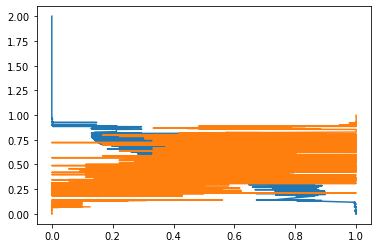

In [ ]:
fpr_arr,tpr_arr,threshold_arr=[],[],[] 
for k in sorted(fpr_of_threshold):
  threshold_arr.append(k) 
  fpr_arr.append(statistics.mean(fpr_of_threshold[k]))
  tpr_arr.append(statistics.mean(tpr_of_threshold[k]))
plt.plot(fpr_arr,threshold_arr)
plt.plot(1-np.array(tpr_arr),threshold_arr) 
plt.show()

In [ ]:
print("Average EER = ",tot_eer/successful_eer_cnt)

Average EER =  0.4922778063868265


In [ ]:
model.evaluate(test_images,pores_output_test) 

1/1 [==============================] - 0s 24ms/step - loss: 0.1066 - accuracy: 0.8124


[0.1066347062587738, 0.8123816847801208]

In [ ]:
print(actual_pores,true_predict,false_predict)
print("Rt = ",true_predict/actual_pores)
print("Rf = ",false_predict/actual_pores)

279 154 82
Rt =  0.5519713261648745
Rf =  0.2939068100358423


Model for matching fingerprint with corresponding person

In [ ]:
def classifying_model():
  first_input = layers.Input(shape=[200,200,3]) 
  out1= layers.Conv2D(3, (4, 4), activation='relu', input_shape=(200, 200, 3))(first_input) 
  second_input = layers.Input(shape=[200,200,1]) 
  out2= layers.Conv2D(2, (4,4), activation='relu', input_shape=(200, 200,1))(second_input) 
  merged=layers.Concatenate()([out1,out2])
  flatten_out=layers.Flatten()(merged)
  out=layers.Dense(30,activation='softmax')(flatten_out)
  m=models.Model(inputs=[first_input,second_input], outputs=out)
  m.compile('Adam','categorical_crossentropy',['accuracy'])
  print(m.summary()) 
  return m 
classify_model=classifying_model() 

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           [(None, 200, 200, 1) 0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 197, 197, 3)  147         input_28[0][0]                   
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 197, 197, 2)  34          input_29[0][0]                   
____________________________________________________________________________________________

In [ ]:
def one_hot_encoding(arr,encoding_size):
  encoded_arr=[] 
  for a in arr:
    temp_arr=[0]*encoding_size 
    temp_arr[a]=1 
    encoded_arr.append(temp_arr)
  return np.array(encoded_arr)
print(one_hot_encoding(train_labels,30).shape)

(120, 30)


Epoch 1/16
4/4 [==============================] - 0s 44ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4407 - val_accuracy: 0.1000
Epoch 2/16
4/4 [==============================] - 0s 33ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4406 - val_accuracy: 0.1000
Epoch 3/16
4/4 [==============================] - 0s 34ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4405 - val_accuracy: 0.1000
Epoch 4/16
4/4 [==============================] - 0s 31ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4405 - val_accuracy: 0.1000
Epoch 5/16
4/4 [==============================] - 0s 32ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4404 - val_accuracy: 0.1000
Epoch 6/16
4/4 [==============================] - 0s 33ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4403 - val_accuracy: 0.1000
Epoch 7/16
4/4 [==============================] - 0s 29ms/step - loss: 5.7618e-08 - accuracy: 1.0000 - val_loss: 6.4403 - val_accuracy: 0.1000

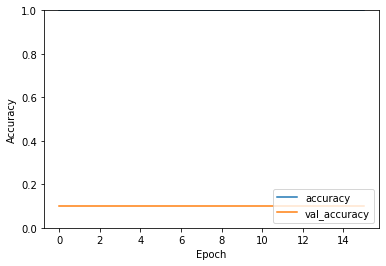

In [ ]:
history = classify_model.fit([train_images,pores_output_train], one_hot_encoding(train_labels,30), epochs=16,validation_data=([test_images,pores_output_test],one_hot_encoding(test_labels,30))) 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
input_class_test=model.predict(test_images) 
test_loss, test_acc = classify_model.evaluate([test_images,input_class_test], one_hot_encoding(test_labels,30), verbose=2)
print(test_loss,test_acc)